모든 자료는 2023년도 기준

In [ ]:
# pip install openpyxl

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# 서울-경기 시별 인구밀도 비교

In [30]:
# 시군구별 인구데이터 불러오기
seoul1 = pd.read_csv('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/서울_주민등록인구(내국인+각+세별_동별)-2023.csv', encoding = 'utf-8')
geunggi1 = pd.read_csv('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/경기_시군별_세대_및_인구_2023.12.csv', encoding = 'cp949')

In [31]:
seoul1 = seoul1.iloc[3:, [1, 2]]

In [34]:
seoul1.columns = ['시군구명', '인구수']

In [36]:
density = geunggi1.iloc[3:, [0, 2]]   # 0번째와 2번째 열 인덱스로 선택
density.columns = ['시군구명', '인구수']   # 열 이름 변경
density = pd.concat([density, seoul1], ignore_index=True)

In [41]:
# 시군구별 면적데이터 불러오기
area_seoul = pd.read_csv('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/서울_행정구역(구별)_면적_2023.csv', encoding = 'utf-8')
area_geunggi = pd.read_excel('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/(별첨)경기도+행정구역+현황+240630(자치행정과).xlsx')

In [ ]:
area_seoul = area_seoul.iloc[3:, [1, 2]]
area_seoul.columns = ['시군구명', '면적']

In [45]:
area_geunggi = area_geunggi.iloc[7:, [0, 1]]
area_geunggi.columns = ['시군구명', '면적']

In [55]:
area = pd.concat([area_seoul, area_geunggi], ignore_index=True)

In [58]:
# 인구, 면적 데이터 병합 후 인구밀도 계산
df_density = pd.merge(density, area, on="시군구명", how="left")
df_density.columns = ['시군구명', '인구수', '면적(km2)']
df_density.loc[28, "면적(km2)"] = 95.7  # 동두천시 면적 NaN에 직접 값 넣기(입력 에러)

In [59]:
df_density['인구밀도'] = df_density['인구수'].astype(int) / df_density['면적(km2)'].astype(float)
df_density['인구밀도'] = df_density['인구밀도'].round(2)

In [60]:
df_density

,시군구명,인구수,면적(km2),인구밀도
0,수원시,1233431,121.09,10186.07
1,용인시,1094561,591.22,1851.36
2,성남시,935966,141.63,6608.53
3,화성시,989676,699.41,1415.02
4,부천시,806356,53.6,15043.96
5,안산시,681529,156.53,4353.98
6,평택시,619844,458.25,1352.63
7,안양시,551112,58.5,9420.72
8,시흥시,556903,138.2,4029.69
9,김포시,508800,276.59,1839.55


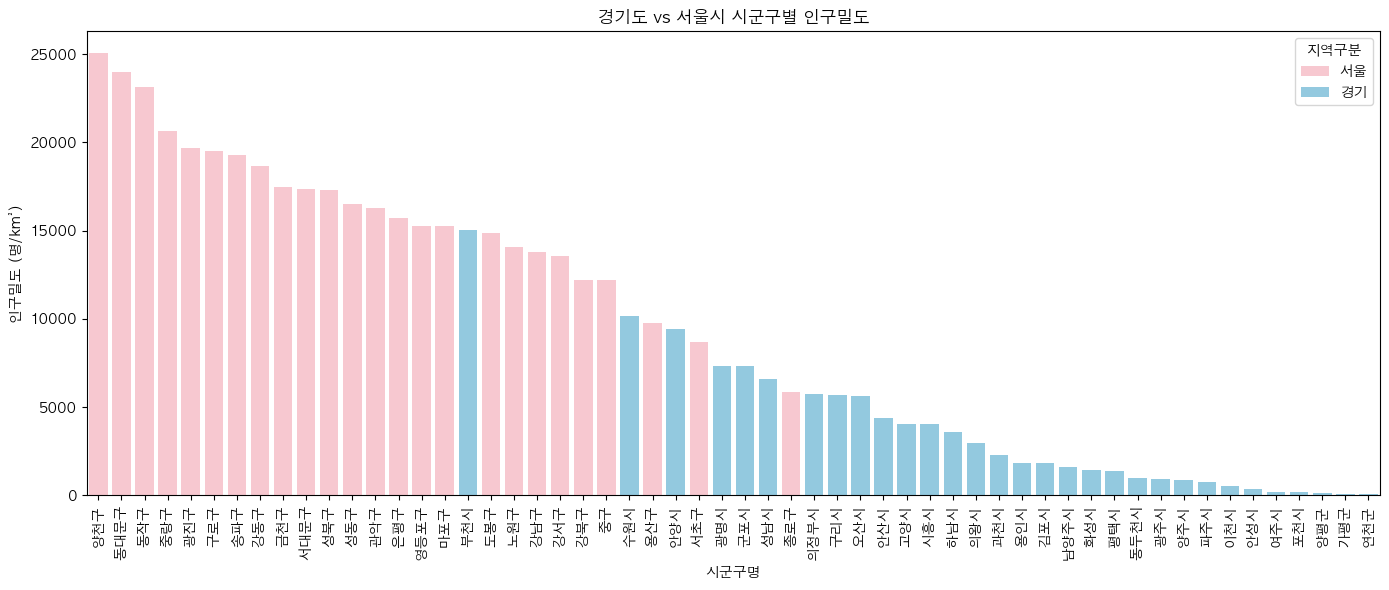

In [62]:
# 인구밀도 막대그래프 그리기 / 시군구 경계 shapefile 있으면 지도 위 히트맵 그리기 가능

# 인구밀도 기준 내림차순 정렬
df_sorted = df_density.sort_values("인구밀도", ascending=False)

# 한글 폰트 설정
rc('font', family='AppleGothic')  # Mac, Windows는 'Malgun Gothic'

# 경기도 시군, 서울시 구 구분 컬럼 추가
df_sorted['지역구분'] = df_sorted['시군구명'].apply(lambda x: '서울' if x.endswith('구') else '경기')

# 색상 지정
palette = {'서울': 'pink', '경기': 'skyblue'}

plt.figure(figsize=(14,6))
sns.barplot(x="시군구명", y="인구밀도", data=df_sorted, hue="지역구분", dodge=False, palette=palette)

plt.xticks(rotation=90)
plt.xlabel("시군구명")
plt.ylabel("인구밀도 (명/km²)")
plt.title("경기도 vs 서울시 시군구별 인구밀도")
plt.legend(title="지역구분")
plt.tight_layout()
plt.show()

## 결과

서울 구들: 대부분 1만 명/km² 이상, 최고 2.5만 명/km² 수준

경기도 시군구: 대부분 1만 명/km² 이하, 심지어 1천~5천 명/km² 수준도 있음

인사이트: 서울은 인구가 촘촘하게 모여있어 공공자전거를 놓을 수 있는 잠재 수요가 충분함. 반대로 경기도는 시군구마다 인구 밀도가 낮아, 한 대여소에서 이용 가능한 수요가 제한적 → 운영 효율성 떨어짐.

# 서울-경기 시별 통근/통학 지역 비교

In [126]:
seoul2 = pd.read_csv('contents/population/서울_통근_통학_지역_2023.csv', encoding = 'utf-8')
geunggi2 = pd.read_csv('contents/population/경기_통근_통학_지역_및_교통수단_편도_기준_2023.csv', encoding = 'cp949')

In [127]:
seoul2 = seoul2.iloc[29:53, [1,5,9]]
seoul2.columns = ['시군구명', '관내이동', '관외이동']

In [128]:
geunggi2 = geunggi2.iloc[52:, [1, 4, 5, 6, 7, 8]]

# 합계 컬럼 만들기 (2~5열 컬럼 합치기)
geunggi2['관외이동'] = geunggi2.iloc[:, 2:6].astype(float).sum(axis=1)
geunggi2 = geunggi2.iloc[:, [0, 1, 6]]
geunggi2.columns = ['시군구명', '관내이동', '관외이동']


In [130]:
commute_area = pd.concat([seoul2, geunggi2], ignore_index=True)

In [149]:
# 숫자 컬럼을 float로 변환
commute_area["관내이동"] = commute_area["관내이동"].astype(float)
commute_area["관외이동"] = commute_area["관외이동"].astype(float)


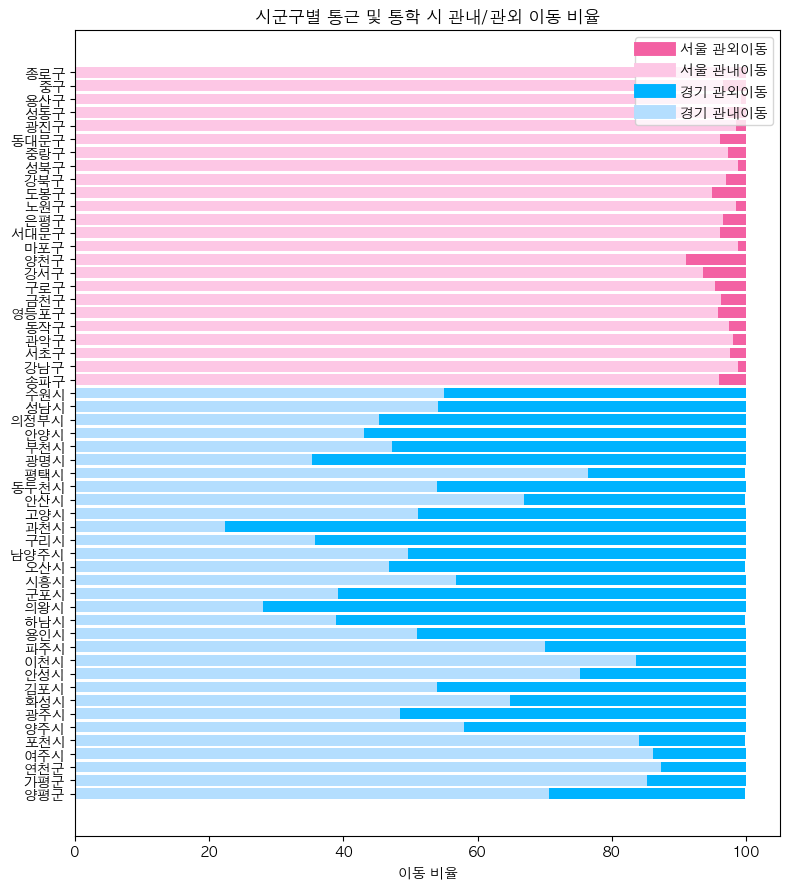

In [196]:
# 색상 설정 (서울/경기 구분 + 관내/관외)
colors = {
    '서울': {'관내이동':"#fdc7e5ff",'관외이동':"#f361a3ff"},
    '경기': {'관내이동':"#b4defe",'관외이동':"#00b3ff"}
}

# 스택형 수평 막대그래프 (값 그대로)
fig, ax = plt.subplots(figsize=(8,9))

for i, row in commute_area.iterrows():
    ax.barh(row['시군구명'], row['관내이동'], color=colors[row['지역']]['관내이동'])
    ax.barh(row['시군구명'], row['관외이동'], left=row['관내이동'], color=colors[row['지역']]['관외이동'])

ax.set_xlabel('이동 비율')
ax.set_title('시군구별 통근 및 통학 시 관내/관외 이동 비율')
plt.legend(handles=[
    plt.Line2D([0],[0], color='#f361a3ff', lw=10, label='서울 관외이동'),
    plt.Line2D([0],[0], color='#fdc7e5ff', lw=10, label='서울 관내이동'),
    plt.Line2D([0],[0], color='#00b3ff', lw=10, label='경기 관외이동'),
    plt.Line2D([0],[0], color='#b4defe', lw=10, label='경기 관내이동')
], loc='upper right')

# y축 순서 뒤집어서 위에서 아래로 표시되도록
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## 결과

서울: 대부분 구가 관내 이동 비율 높음 → 시 내에서 짧은 거리 이동이 많음

경기: 관외 이동 비율 높음 → 다른 시(특히 서울)로 출퇴근/통학 많이 함

인사이트:

공공자전거는 “근거리, 시 내 이동”에 최적화되어 있음

서울은 관내 이동 많아서 공공자전거 이용 가능성이 높음

경기도는 관외 이동 많아 장거리 이동 수단이 필요한데, 자전거는 적합하지 않음

# 경기 시별 통근/통학 시간 > 어떻게 활용할지?

In [162]:
geunggi3 = pd.read_csv('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/경기_통근시_평균_소요_시간_편도_기준_2023.csv', encoding = 'cp949')

In [163]:
geunggi3

,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14,2023.15
0,구분별(1),구분별(2),통근함 (%),통근시 평균 소요 시간(편도기준) (분),통근 지역별 평균 소요 시간(편도 기준) (분),통근 지역별 평균 소요 시간(편도 기준) (분),통근 지역별 평균 소요 시간(편도 기준) (분),통근 지역별 평균 소요 시간(편도 기준) (분),통근 지역별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분),통근시 이용 교통수단별 평균 소요 시간(편도 기준) (분)
1,구분별(1),구분별(2),소계,소계,거주시군내,도내다른 시군,서울,인천,타 시도,승용차,버스,전철 지하철,택시,기차,걸어서,자전거,승합차,기타
2,전체,소계,62.0,39.4,23.6,47.9,67.3,58.0,82.3,36.8,45.7,63.8,30.6,96.2,13.7,21.0,39.3,31.9
3,주택형태별,단독주택,68.0,32.5,20.6,47.7,65.9,64.3,83.5,33.9,40.5,57.9,21.0,123.3,11.0,19.6,38.6,26.2
4,주택형태별,아파트,79.7,42.8,24.5,48.1,67.2,54.6,81.8,39.4,51.8,66.6,32.9,101.3,15.5,23.2,43.5,37.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,지역별,포천시,58.4,23.1,18.1,42.5,70.9,100.5,65.4,24.4,37.5,74.0,5.0,0.0,8.5,8.9,23.4,19.7
79,지역별,여주시,65.3,20.0,16.0,37.4,81.4,0.0,56.2,21.4,28.7,103.9,0.0,0.0,8.4,16.0,17.9,12.9
80,지역별,연천군,63.3,18.6,15.3,35.7,93.9,90.0,87.0,20.7,21.7,77.0,11.0,0.0,8.7,18.7,20.9,21.7
81,지역별,가평군,65.8,20.3,13.2,53.8,76.3,103.9,53.1,24.7,31.3,68.7,15.0,0.0,6.5,11.8,23.1,11.3


# 서울-경기 시별 주거지/상업지 비율 비교

In [189]:
seoul4 = pd.read_csv('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/서울_용도지역_2023.csv', encoding = 'utf-8')
geunggi4 = pd.read_csv('/Users/minjikim/Desktop/sesac/프로젝트 1/contents/population/경기_용도지역_2023.csv', encoding = 'cp949')

In [190]:
seoul4 = seoul4.iloc[5:, [1, 3, 13, 18, 22]]
seoul4.columns = ['시군구명', '주거지역', '상업지역', '공업지역', '녹지지역']
seoul4

,시군구명,주거지역,상업지역,공업지역,녹지지역
5,종로구,9830838,2937285,-,11204384
6,중구,6013132,3936025,-,25135
7,용산구,12181023,1274398,-,8443345
8,성동구,9931728,489058,2051234,4332406
9,광진구,11593626,206616,-,5274873
10,동대문구,13036995,825357,-,383081
11,중랑구,10808521,370813,-,7352187
12,성북구,17826125,400714,-,6394593
13,강북구,10890430,280749,-,12464840
14,도봉구,8095692,258659,1489295,10835406


In [191]:
geunggi4 = geunggi4.iloc[6:, [1, 7, 16, 21, 25]]
geunggi4.columns = ['시군구명', '주거지역', '상업지역', '공업지역', '녹지지역']
geunggi4

,시군구명,주거지역,상업지역,공업지역,녹지지역
6,성남시,31248,5239,1744,103589
7,안양시,15148,2211,3230,37910
8,부천시,26970,3496,4442,18542
9,광명시,9363,1732,697,26715
10,평택시,39905,6410,30079,74515
11,안산시,24934,2931,16696,106911
12,과천시,4502,236,-,31115
13,오산시,11344,1079,2530,27754
14,시흥시,24224,1918,12130,96784
15,군포시,8275,680,2602,24903


In [192]:
area_usage = pd.concat([seoul4, geunggi4], ignore_index=True)
area_usage = area_usage.iloc[:, :4]
area_usage

,시군구명,주거지역,상업지역,공업지역
0,종로구,9830838,2937285,-
1,중구,6013132,3936025,-
2,용산구,12181023,1274398,-
3,성동구,9931728,489058,2051234
4,광진구,11593626,206616,-
5,동대문구,13036995,825357,-
6,중랑구,10808521,370813,-
7,성북구,17826125,400714,-
8,강북구,10890430,280749,-
9,도봉구,8095692,258659,1489295


In [193]:
# 숫자 컬럼을 float로 변환
area_usage["주거지역"] = area_usage["주거지역"].astype(float)
area_usage["상업지역"] = area_usage["상업지역"].astype(float)
area_usage["공업지역"] = area_usage["공업지역"].replace("-", 0).astype(float)

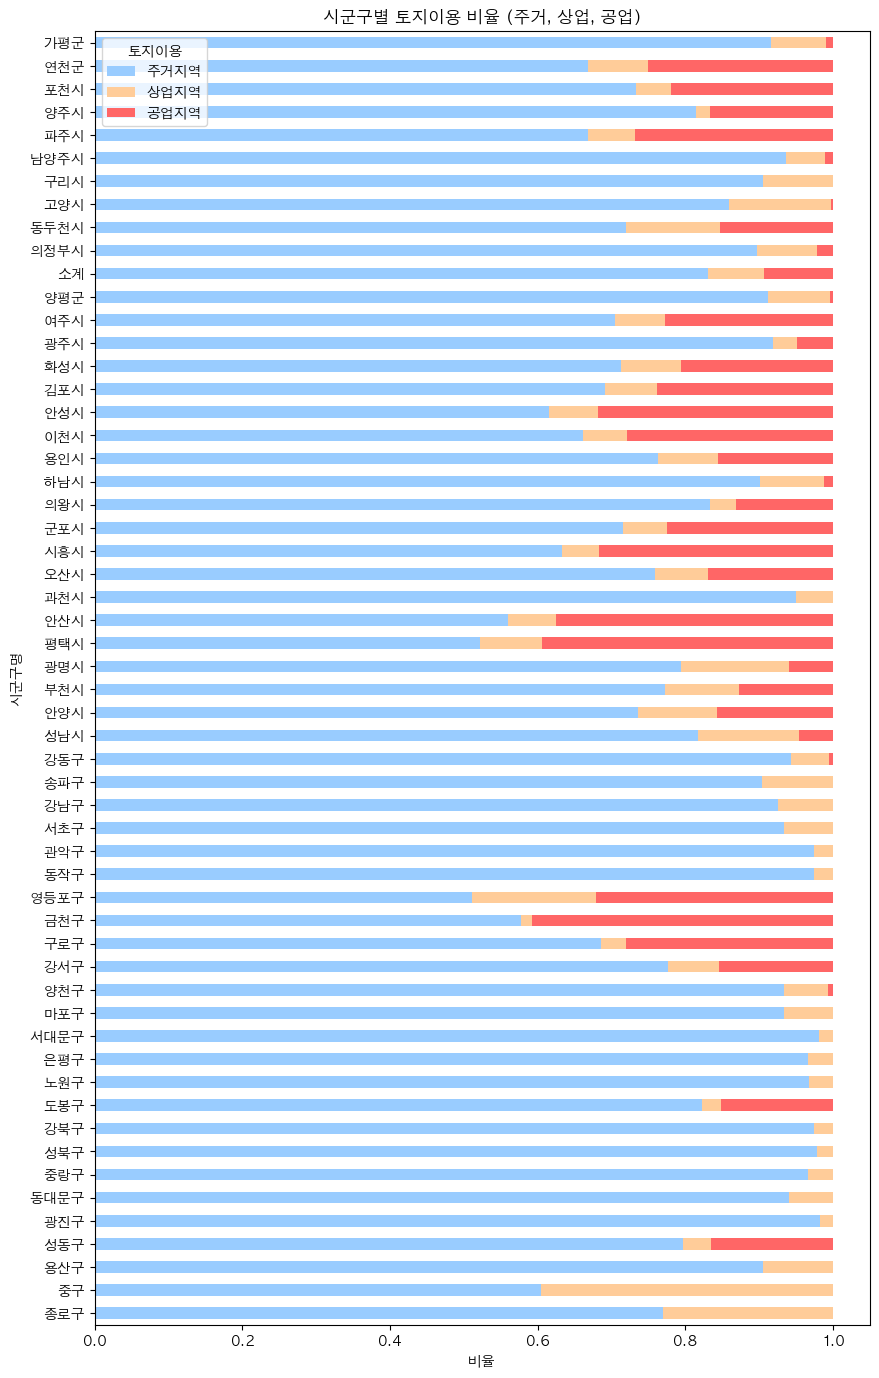

In [194]:
# 시군구별 총합 계산
area_usage["총합"] = area_usage[["주거지역", "상업지역", "공업지역"]].sum(axis=1)

# 비율 계산
df_ratio = area_usage.copy()
for col in ["주거지역", "상업지역", "공업지역"]:
    df_ratio[col] = df_ratio[col] / df_ratio["총합"]

# 수평 스택형 막대그래프
colors = ["#99ccff", "#ffcc99", "#ff6666"]  # 주거, 상업, 공업 색
df_ratio.set_index("시군구명")[["주거지역","상업지역","공업지역"]].plot(
    kind="barh", stacked=True, color=colors, figsize=(10, len(area_usage)*0.3)
)

plt.xlabel("비율")
plt.ylabel("시군구명")
plt.title("시군구별 토지이용 비율 (주거, 상업, 공업)")
plt.legend(title="토지이용")
plt.show()

## 결과

단순 면적 비율로는 이동 근거 찾을 수 없음.
밀도가 중요.